In [4]:
import numpy as np
import matplotlib.pyplot as plt



from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

import h5py

file = h5py.File("sim1.h5")

try:
    dset1 = np.array(file["/numres"])
    dset2 = np.array(file["/evals"])
    dset3 = np.array(file["/params"])
    
except ValueError as err:
    file.close()
    
print(dset1.shape)
print(dset2.shape)
print(dset3.shape)
print(dset3)


plt.rc('font', family='serif')
plt.rc('xtick', labelsize='xx-large')
plt.rc('ytick', labelsize='xx-large')


pot = lambda x: -1/np.sqrt(x**2+1)

nx = int(dset3[0])
ne = int(dset3[1])
xmax = dset3[-1]

cmap = plt.get_cmap('rainbow')
# Using a symmetric potentential
xmin = -dset3[-1]

n_lvl = np.int32(np.ceil(dset1.size/nx))

h = (xmax - xmin)/(nx)
x = np.linspace(xmin, xmax, nx)
for i in range(0, n_lvl):
    
    c = np.trapz(dset1[i*nx:i*nx+nx]**2,dx=h)
    dset1[i*nx:i*nx+nx]*= 1/np.sqrt(c)
    
lines1 = []
lines2  = []
for i in range(6, n_lvl-1):
    
    
    col = cmap(np.float64(n_lvl)/(i**2))
    templine, = plt.plot(x, 0.35 * dset1[i*nx:i*nx+nx]**2+dset2[i], c=col,
             label="$|\psi_{"+str(n_lvl-i)+"}|^2$", linewidth=3)
    lines1.append(templine)
    templine2, = plt.plot(x, dset2[i]*np.ones(x.size), "--",c=col, linewidth=3,
             label="$E_"+str(n_lvl-i)+"$")
    lines2.append(templine2)
    
plt.xlabel("$x \ (a.u.)$", size = 30)
plt.ylabel("$V(x) \ (a.u.)$", size = 30)
plt.xlim(-30,30)
plt.ylim(-0.25,0.0)
templine2, = plt.plot(x, pot(x),"-.", label=r"$V(x) =  - \frac{1}{\sqrt{(x^2+1)}$", 
        linewidth=3, c="black")
lines2.append(templine2)
leg1  = plt.legend(handles=lines1,loc='best', frameon=False, fontsize=23,ncol=1)
leg2 = plt.legend(handles=lines2,loc='best', frameon=False, fontsize=23,ncol=1)
ax = plt.gca().add_artist(leg1)
plt.show()
file.close()

KeyError: "Unable to open object (Object 'numres' doesn't exist)"

/home/boehme03/.local/lib/python3.4/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


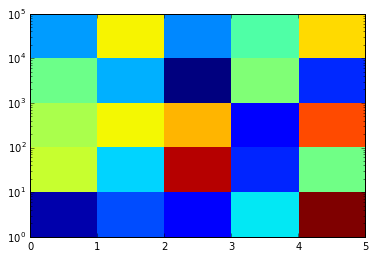

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tmp = np.random.random((5,5))
plt.yscale("log")
plt.imshow(tmp, aspect="auto", extent=(0,5, 1e0, 1e5),interpolation='nearest')
plt.show()
